# TAKE HOME ASSIGNMENT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [2]:
os.chdir(r"C:\Users\thuyd\OneDrive\Documents\Sally\Take_Home_Assignment")

##  A) ML MODELS

### DATA CLEANING AND PRE-PROCESSING

In [3]:
df_train = pd.read_csv('adult_trdata.csv')
df_test = pd.read_csv('adult_test.csv')
df_train.head()

#changing columns names on train

df_train.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_yrs', 'marital_stat', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df_train.head()
print(df_train.shape[0])

32560


In [4]:
df_train.head()

,age,workclass,fnlwgt,education,education_yrs,marital_stat,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df_test.reset_index(inplace=True)

In [6]:
#changing columns names on test

df_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_yrs', 'marital_stat', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df_test.head()

,age,workclass,fnlwgt,education,education_yrs,marital_stat,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
#Replacing data in train dataset

df_train['education'] = df_train['education'].replace({'Preschool','1st-4th','5th-6th', '7th-8th'}, 'Elementary/Secondary', regex=True)
df_train['education'] = df_train['education'].replace({'9th','10th', '11th', '12th', 'HS-grad'}, 'High-School', regex=True)
df_train['education'] = df_train['education'].replace({'Masters', 'Doctorate'}, 'Advanced', regex=True)
df_train['education'] = df_train['education'].replace({'Prof-school', 'Assoc-acdm', 'Assoc-voc'}, 'Professional-School', regex=True)

df_train['workclass'] = df_train['workclass'].replace({'Self-emp-inc', 'Self-emp-not-inc'}, 'Self-Employed', regex=True)
df_train['workclass'] = df_train['workclass'].replace({'Local-gov', 'State-gov', 'Federal-gov'}, 'Gov-job', regex=True)
df_train['workclass'] = df_train['workclass'].replace({'Without-pay','Never-worked'}, 'Unemployed', regex=True)

df_train['marital_stat'] = df_train['marital_stat'].replace({'Never-married','Divorced', 'Separated', 'Widowed'}, 'Single', regex=True)
df_train['marital_stat'] = df_train['marital_stat'].replace({'Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'}, 'Married', regex=True)
df_train.head()

,age,workclass,fnlwgt,education,education_yrs,marital_stat,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-Employed,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,High-School,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,High-School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Advanced,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
#Replacing data in test dataset

df_test['education'] = df_test['education'].replace({'Preschool','1st-4th','5th-6th', '7th-8th'}, 'Elementary/Secondary', regex=True)
df_test['education'] = df_test['education'].replace({'9th','10th', '11th', '12th', 'HS-grad'}, 'High-School', regex=True)
df_test['education'] = df_test['education'].replace({'Masters', 'Doctorate'}, 'Advanced', regex=True)
df_test['education'] = df_test['education'].replace({'Prof-school', 'Assoc-acdm', 'Assoc-voc'}, 'Professional-School', regex=True)

df_test['workclass'] = df_test['workclass'].replace({'Self-emp-inc', 'Self-emp-not-inc'}, 'Self-Employed', regex=True)
df_test['workclass'] = df_test['workclass'].replace({'Local-gov', 'State-gov', 'Federal-gov'}, 'Gov-job', regex=True)
df_test['workclass'] = df_test['workclass'].replace({'Without-pay','Never-worked'}, 'Unemployed', regex=True)

df_test['marital_stat'] = df_test['marital_stat'].replace({'Never-married','Divorced', 'Separated', 'Widowed'}, 'Single', regex=True)
df_test['marital_stat'] = df_test['marital_stat'].replace({'Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'}, 'Married', regex=True)


In [9]:
# Checking NA values

np.sum(df_train.isna())
np.sum(df_test.isna())

# No NA in both train and test

age               0
workclass         0
fnlwgt            0
education         0
education_yrs     0
marital_stat      0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
#Convert <=50k to 0 and >50k to 1

df_train['income'] = df_train['income'].replace({'<=50K'}, 0, regex=True)
df_train['income'] = df_train['income'].replace({'>50K'}, 1, regex=True)
df_test['income'] = df_test['income'].replace({'<=50K'}, 0, regex=True)
df_test['income'] = df_test['income'].replace({'>50K'}, 1, regex=True)


In [11]:
# identify "?" in workclass and occupation columns, replace it with "Others"
df_train['workclass'] = df_train['workclass'].replace({r'\?'}, 'Others', regex=True)
df_test['workclass'] = df_test['workclass'].replace({r'\?'}, 'Others', regex=True)
df_train['occupation'] = df_train['occupation'].replace({r'\?'}, 'Others', regex=True)
df_test['occupation'] = df_test['occupation'].replace({r'\?'}, 'Others', regex=True)

### EXPLORATORY

income  education            
0        Advanced                  871
         Bachelors                3133
         Elementary/Secondary     1136
         High-School             11699
         Professional-School      1976
         Some-college             5904
1        Advanced                 1265
         Bachelors                2221
         Elementary/Secondary       62
         High-School              1857
         Professional-School      1049
         Some-college             1387
Name: education, dtype: int64

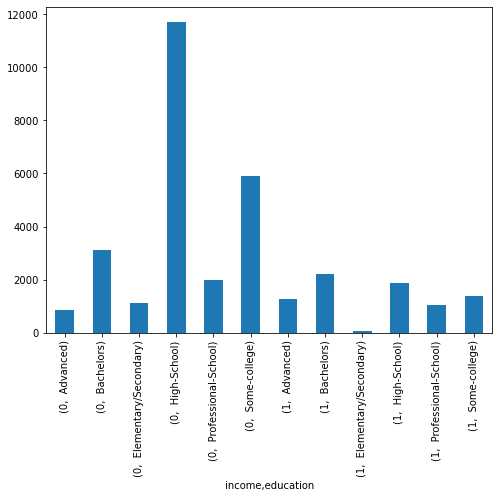

In [12]:
education_income = df_train.groupby(["income","education"]).education.count()
fig, ax = plt.subplots(figsize=(8,6))
education_plot =education_income.plot(kind='bar', ax=ax)
education_income

# Observation: Majority of Low income group are High-school  graduate 
# while majority of high-income has Bachelors and Advance

income  workclass     
0        Gov-job           3009
         Others            1645
         Private          17733
         Self-Employed     2311
         Unemployed          21
1        Gov-job           1341
         Others             191
         Private           4963
         Self-Employed     1346
Name: workclass, dtype: int64

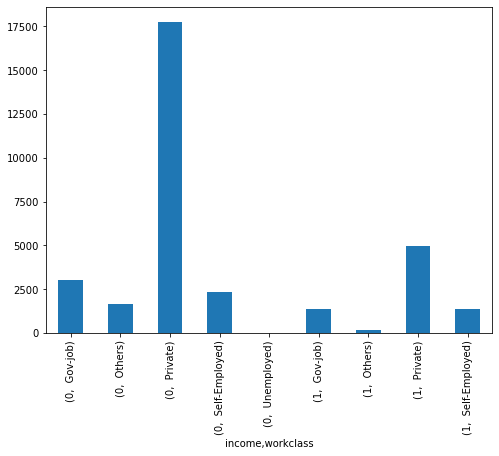

In [13]:
workclass_income = df_train.groupby(["income","workclass"]).workclass.count()
fig, ax = plt.subplots(figsize=(8,6))
workclass_plot = workclass_income.plot(kind='bar', ax=ax)
workclass_income

# Observation: Most of high income group work in private workclass

C:\Users\thuyd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

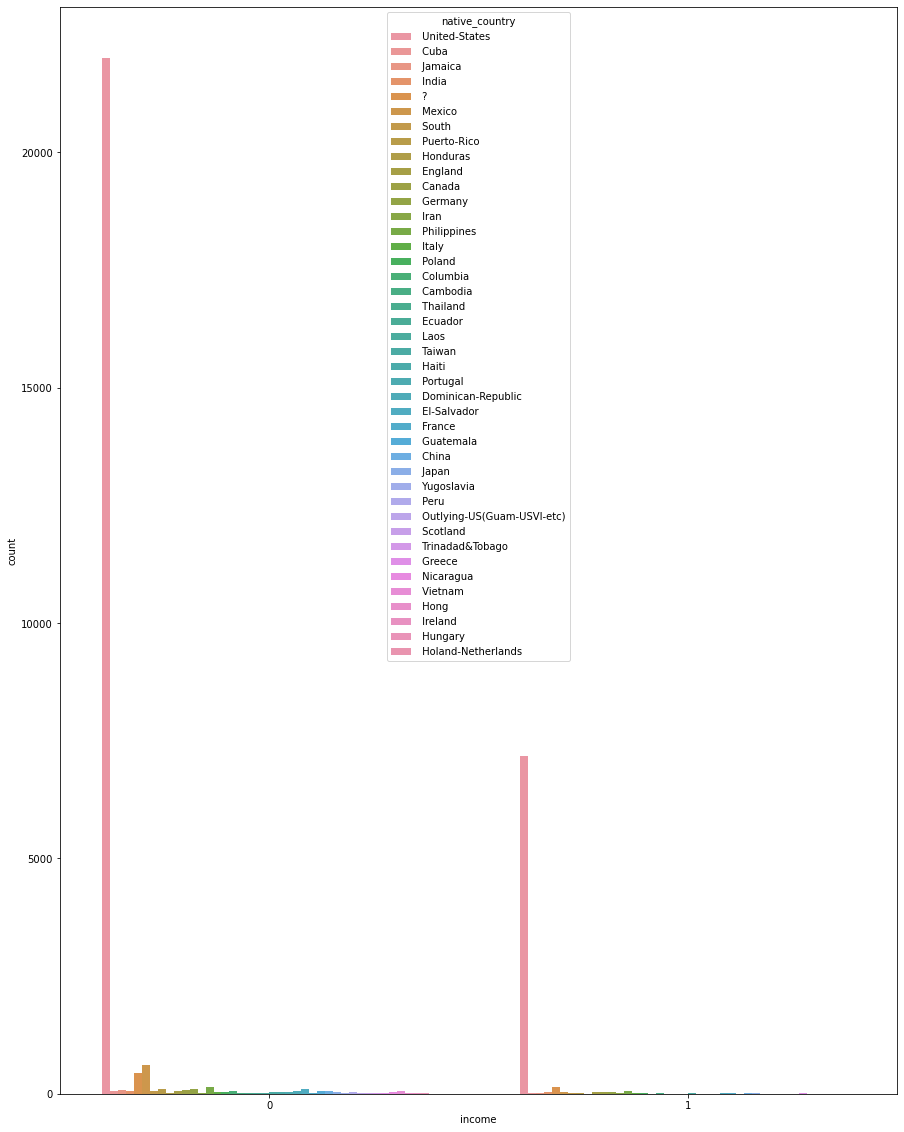

In [14]:
#A box plot of country on income 

plt.figure(figsize=(15,20))
sns.countplot('income', hue='native_country', data=df_train)

# Most of observations are from US and the trend we can see is more US people makes less than 50k. However, since
# majority of observations are from US, this might not be helpful for further classification so I will 
# exclude this varibable out of our dataset

# Side nots: Another reason to drop this columns is value in native_country in train and test data is slightly different
# which leads to different in number of columns after dummified train and test. Different column size cause ML model cannot
# run on test set so dropping this columns is better for further analysis.

In [15]:
#Drop native_country column
df_train = df_train.drop(['native_country'], axis = 1)
df_test = df_test.drop(['native_country'], axis = 1)

C:\Users\thuyd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='age'>

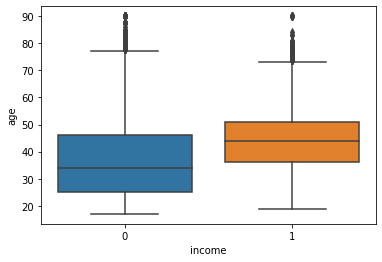

In [16]:
#A box plot of age distribution on income 
sns.boxplot(df_train.income,df_train.age)

# Majority of people who make >50K has age distributionMajority between 35-50 with the median age of 
# People who make <= 50K have age distribution between 25-45 with the median agae of 35.

C:\Users\thuyd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Income based on marital status')

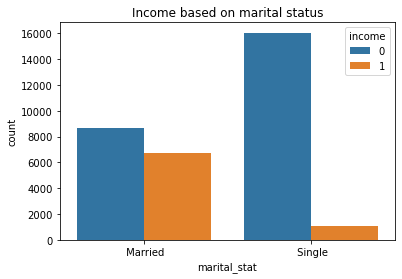

In [17]:
#Marital status on income

sns.countplot('marital_stat', hue='income', data=df_train)
plt.title('Income based on marital status')

# Based on the graph, married people make more income than single (>50K),

C:\Users\thuyd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Income based on marital status')

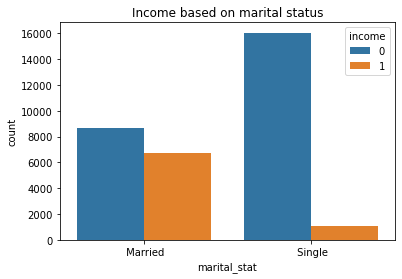

In [18]:
#Country on income

sns.countplot('marital_stat', hue='income', data=df_train)
plt.title('Income based on marital status')

# Based on the graph, married people make more income than single (>50K)

<AxesSubplot:>

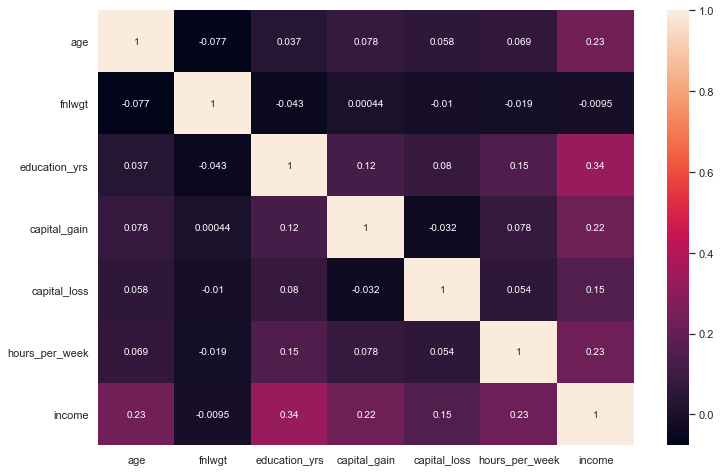

In [19]:
# Heatmap

corr = df_train[['age','fnlwgt','education_yrs','capital_gain','capital_loss','hours_per_week','income']].corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

# There is no strong correlations between independent variables which mitigate multicollinearity.
# The strongest correlation can be found is between years of education and income

### MODEL FITTING

In [20]:
# spling df_train to x_train, y_train and df_test to x_test, y_test

x_train_ori = df_train.drop(['income'], axis = 1)
y_train = df_train['income']

x_test_ori = df_test.drop(['income'], axis = 1)
y_test = df_test['income']
x_train_ori.head()

,age,workclass,fnlwgt,education,education_yrs,marital_stat,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,50,Self-Employed,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13
1,38,Private,215646,High-School,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40
2,53,Private,234721,High-School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40
4,37,Private,284582,Advanced,14,Married,Exec-managerial,Wife,White,Female,0,0,40


In [21]:
# Getting dummy from x_train and x_test

x_train = pd.get_dummies(x_train_ori,columns = ['workclass', 'education', 'marital_stat', 'occupation', 'relationship', 'race', 'sex'],drop_first=True)
x_test = pd.get_dummies(x_test_ori,columns = ['workclass', 'education', 'marital_stat', 'occupation', 'relationship', 'race', 'sex'],drop_first=True)

In [22]:
# Normalize the dataset for better fit
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_train_scaled
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_train_scaled

,age,fnlwgt,education_yrs,capital_gain,capital_loss,hours_per_week,workclass_ Others,workclass_ Private,workclass_ Self-Employed,workclass_ Unemployed,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,0.837097,-1.008742,1.134779,-0.145914,-0.216663,-2.222120,-0.244454,-1.516869,2.811312,-0.025404,...,-0.585105,-0.176253,-0.429354,-0.344038,-0.224930,-0.181555,-0.325774,-0.091613,0.413027,0.703087
1,-0.042640,0.245046,-0.420027,-0.145914,-0.216663,-0.035430,-0.244454,0.659253,-0.355706,-0.025404,...,1.709094,-0.176253,-0.429354,-0.344038,-0.224930,-0.181555,-0.325774,-0.091613,0.413027,0.703087
2,1.057031,0.425770,-1.197429,-0.145914,-0.216663,-0.035430,-0.244454,0.659253,-0.355706,-0.025404,...,-0.585105,-0.176253,-0.429354,-0.344038,-0.224930,-0.181555,3.069615,-0.091613,-2.421148,0.703087
3,-0.775755,1.408146,1.134779,-0.145914,-0.216663,-0.035430,-0.244454,0.659253,-0.355706,-0.025404,...,-0.585105,-0.176253,-0.429354,-0.344038,4.445819,-0.181555,3.069615,-0.091613,-2.421148,-1.422298
4,-0.115952,0.898170,1.523480,-0.145914,-0.216663,-0.035430,-0.244454,0.659253,-0.355706,-0.025404,...,-0.585105,-0.176253,-0.429354,-0.344038,4.445819,-0.181555,-0.325774,-0.091613,0.413027,-1.422298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.639710,0.746077,-0.145914,-0.216663,-0.197407,-0.244454,0.659253,-0.355706,-0.025404,...,-0.585105,-0.176253,-0.429354,-0.344038,4.445819,-0.181555,-0.325774,-0.091613,0.413027,-1.422298
32556,0.103982,-0.335466,-0.420027,-0.145914,-0.216663,-0.035430,-0.244454,0.659253,-0.355706,-0.025404,...,-0.585105,-0.176253,-0.429354,-0.344038,-0.224930,-0.181555,-0.325774,-0.091613,0.413027,0.703087
32557,1.423589,-0.358811,-0.420027,-0.145914,-0.216663,-0.035430,-0.244454,0.659253,-0.355706,-0.025404,...,-0.585105,-0.176253,-0.429354,2.906654,-0.224930,-0.181555,-0.325774,-0.091613,0.413027,-1.422298
32558,-1.215624,0.110927,-0.420027,-0.145914,-0.216663,-1.655200,-0.244454,0.659253,-0.355706,-0.025404,...,-0.585105,-0.176253,2.329082,-0.344038,-0.224930,-0.181555,-0.325774,-0.091613,0.413027,0.703087


### RANDOM FOREST CLASSIFIER

In [23]:
# Random Forest Classifier
RFC_Model = RandomForestClassifier(n_estimators = 100)
RFC_Model.fit(x_train_scaled,y_train)
RFC_Predict = RFC_Model.predict(x_test_scaled)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

# Accuracy score of 84.85% is a high score

Accuracy: 0.8483508384005897


In [24]:
# Confusion matrix
print(confusion_matrix(y_test,RFC_Predict))
print(classification_report(y_test,RFC_Predict))


[[11493   942]
 [ 1527  2319]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.71      0.60      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.84      0.85      0.84     16281



No handles with labels found to put in legend.


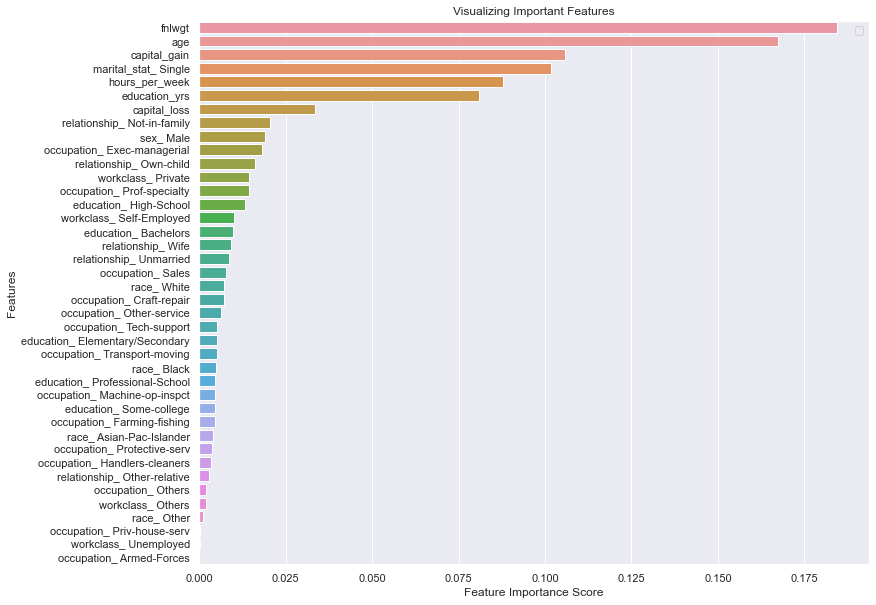

In [25]:
# Feature important scores
feature_imp = pd.Series(RFC_Model.feature_importances_,index=x_train_scaled.columns).sort_values(ascending=False)
feature_imp
%matplotlib inline
plt.figure(figsize=(12,10))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Analysis
From the confustion matrix, Type 1 error: false positive rate (people who is wrongly classified at making more than 50K) is 5.77%. (909/ total cases)

Our type 2 error: False negative rate is 11.9% (1534/total cases)

In our cases, type 1 error is more dangerous as we dont want to falsely classify people with low income as high so luckily, the rate of 5.8% is relatively low

From the important visualization, fnlwgt attribute has the highest impact on the classification on whether a person makes high income or not

### LOGISTIC REGRESSION

In [26]:
LR_Model = LogisticRegression()
LR_Model.fit(x_train_scaled, y_train)
LR_Predict = LR_Model.predict(x_test_scaled)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Model Accuracy: " + str(LR_Accuracy))

Model Accuracy: 0.8531416989128432


In [27]:
result = sm.Logit(y_test, x_test_scaled).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.416734
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                16281
Model:                          Logit   Df Residuals:                    16241
Method:                           MLE   Df Model:                           39
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:                  0.2377
Time:                        19:50:07   Log-Likelihood:                -6784.8
converged:                       True   LL-Null:                       -8900.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
age                                 0.1912      0.026      7.362  

In [28]:
cnf_matrix = confusion_matrix(y_test, LR_Predict)
print(cnf_matrix)

[[11557   878]
 [ 1513  2333]]


### Analysis
Logistic Regression has higher accuracy score than Random Forest Classifier (85.3% vs 84.8%)

Comparing confusion matrix, the type 1 error of LR is 5.4% which is lower than Random Forest Classifier.

Therefore, we will choose LR between the 2 models.